In [54]:
# Create Latitude and Longitude Combinations (6.1.4)

In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
from config import weather_api_key

In [56]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e5ea00c61278198cb82387f60fb84608


In [57]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [58]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-49.04982072367173, -52.49638318866943),
 (-12.883922968847813, 150.38777396676204),
 (-88.78530461070928, 50.20750962394433),
 (-69.44957231373675, -177.43407632813808),
 (12.433710977104667, -73.63440235708354),
 (0.997397016549769, 129.52090493370014),
 (-84.46090412309835, 57.985872431055526),
 (-20.033640671555375, -137.28924061079127),
 (-33.49371548144373, -107.18343166311512),
 (-43.53962680298748, -82.34515123901424),
 (-69.41378354427864, 16.788840384885702),
 (33.982254076912994, 127.18011524530937),
 (31.63419081558918, 60.7840868515506),
 (57.73924445199739, -137.08451387970348),
 (44.56845907370814, -110.37429934347227),
 (-40.483147669902934, -64.07373839419871),
 (26.840460927610536, -83.69346231781392),
 (-8.469682012416115, 81.69389863135052),
 (-2.847244054108529, -11.204115957843783),
 (72.13529821088036, 109.41020667368201),
 (-38.91534029849301, -151.46528222267207),
 (54.033456830808746, -148.8114570911306),
 (-15.445022919974903, -2.4529438094766363),
 (38.987

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

In [ ]:
# Import Dependencies, and Initialize an Empty List and Counters (6.2.6)

In [ ]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [59]:
# Create an empty list to hold the weather data.
city_data = []

# Create counters
record_count = 1
set_count = 1

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | grand centre
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | bubaque
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | muzhi
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | marsh harbour
Processing Record 16 of Set 1 | nurobod
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | bonavista
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | na

Processing Record 34 of Set 4 | maarianhamina
Processing Record 35 of Set 4 | kahului
Processing Record 36 of Set 4 | bossangoa
Processing Record 37 of Set 4 | bengkulu
Processing Record 38 of Set 4 | spearfish
Processing Record 39 of Set 4 | manaure
Processing Record 40 of Set 4 | baker city
Processing Record 41 of Set 4 | poum
Processing Record 42 of Set 4 | holme
Processing Record 43 of Set 4 | kingussie
Processing Record 44 of Set 4 | strezhevoy
Processing Record 45 of Set 4 | chelno-vershiny
Processing Record 46 of Set 4 | avarua
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | aktash
Processing Record 49 of Set 4 | rawah
Processing Record 50 of Set 4 | solsvik
City not found. Skipping...
Processing Record 1 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 2 of Set 5 | bedele
Processing Record 3 of Set 5 | gravdal
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | cherskiy
Processing Record 6 of Set 5 | nelson bay
Pro

Processing Record 23 of Set 8 | atambua
Processing Record 24 of Set 8 | pierre
Processing Record 25 of Set 8 | miramar
Processing Record 26 of Set 8 | lakatoro
Processing Record 27 of Set 8 | wahran
City not found. Skipping...
Processing Record 28 of Set 8 | saleaula
City not found. Skipping...
Processing Record 29 of Set 8 | shenjiamen
Processing Record 30 of Set 8 | coahuayana
Processing Record 31 of Set 8 | kursk
Processing Record 32 of Set 8 | tarakan
Processing Record 33 of Set 8 | marysville
Processing Record 34 of Set 8 | sanary-sur-mer
Processing Record 35 of Set 8 | alotau
City not found. Skipping...
Processing Record 36 of Set 8 | grand-santi
Processing Record 37 of Set 8 | kristinehamn
Processing Record 38 of Set 8 | ranau
Processing Record 39 of Set 8 | znamenskoye
Processing Record 40 of Set 8 | suntar
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | santa maria
Processing Record 43 of Set 8 | sulangan
Processing Record 44 of Set 8 | maldonado
Proces

Processing Record 9 of Set 12 | svirstroy
Processing Record 10 of Set 12 | kimbe
Processing Record 11 of Set 12 | morondava
Processing Record 12 of Set 12 | touros
Processing Record 13 of Set 12 | cairo
Processing Record 14 of Set 12 | kleck
City not found. Skipping...
Processing Record 15 of Set 12 | clarence town
Processing Record 16 of Set 12 | ler
Processing Record 17 of Set 12 | yaan
Processing Record 18 of Set 12 | biltine
Processing Record 19 of Set 12 | swellendam
Processing Record 20 of Set 12 | koping
Processing Record 21 of Set 12 | mount darwin
Processing Record 22 of Set 12 | kuusankoski
Processing Record 23 of Set 12 | eureka
Processing Record 24 of Set 12 | kaabong
Processing Record 25 of Set 12 | gat
Processing Record 26 of Set 12 | nador
Processing Record 27 of Set 12 | karratha
Processing Record 28 of Set 12 | cilegon
Processing Record 29 of Set 12 | tolaga bay
Processing Record 30 of Set 12 | yar-sale
Processing Record 31 of Set 12 | trofors
Processing Record 32 of S

In [60]:
# Get the length of the appended list
len(city_data)

556

In [63]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Rearrange column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-09-23 23:53:45,-54.8000,-68.3000,46.06,46,40,16.11
1,Hermanus,ZA,2021-09-23 23:53:45,-34.4187,19.2345,55.90,90,75,9.69
2,Mahebourg,MU,2021-09-23 23:53:45,-20.4081,57.7000,73.26,83,75,11.50
3,Barrow,US,2021-09-23 23:53:23,71.2906,-156.7887,28.94,77,100,5.37
4,Vaini,TO,2021-09-23 23:53:46,-21.2000,-175.2000,80.76,78,40,10.36
...,...,...,...,...,...,...,...,...,...
551,Hami,CN,2021-09-23 23:57:06,42.8000,93.4500,63.66,21,15,2.93
552,Paamiut,GL,2021-09-23 23:57:06,61.9940,-49.6678,32.49,72,8,18.34
553,Umm Lajj,SA,2021-09-23 23:57:08,25.0213,37.2685,82.78,60,2,9.10
554,Kopavogur,IS,2021-09-23 23:57:08,64.1123,-21.9130,41.85,81,20,10.36


In [65]:
# Create the output file (CSV). 
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


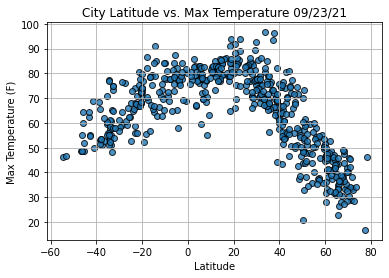

In [72]:
# Create the scatterplot for Max Temp
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


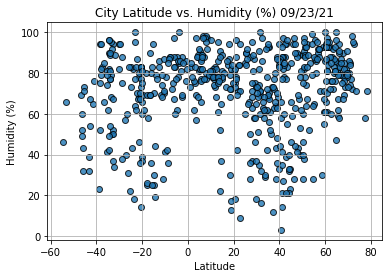

In [76]:
# Create the scatterplot for Humidity by refactoring the code
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

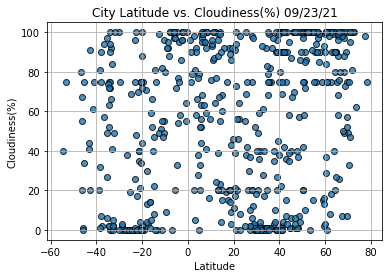

In [77]:
# Create the scatterplot for cloudiness
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

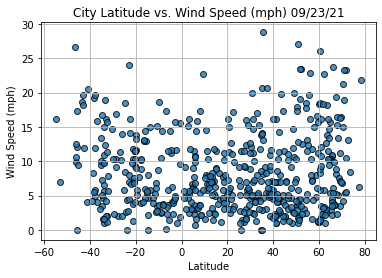

In [78]:
# Create the scatterplot for Windspeed
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()